#### Name: Sumanasekara W.K.G.G.
#### Index: 190610E

In [100]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#### Average kernal vs. Gaussian kernal

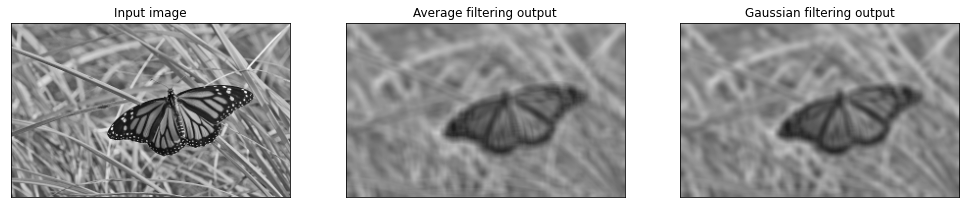

In [101]:
img_butterfly = cv.imread("butterfly.jpg", cv.IMREAD_REDUCED_GRAYSCALE_4)
assert img_butterfly is not None

kernal1 = np.ones((9, 9), np.float32)/81
averaged_output = cv.filter2D(img_butterfly, -1, kernal1)
gaussian_output = cv.GaussianBlur(img_butterfly, (9, 9), 4)

fig, ax = plt.subplots(1, 3, figsize = (17, 10))
ax[0].imshow(img_butterfly, cmap="gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Input image")

ax[1].imshow(averaged_output, cmap="gray", vmin=0, vmax=255)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Average filtering output")

ax[2].imshow(gaussian_output, cmap="gray", vmin=0, vmax=255)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title("Gaussian filtering output")

plt.show()

#### Gaussian kernal

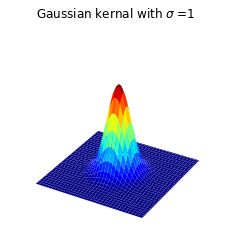

In [102]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

step = 0.1
sigma = 1

X = np.arange(-5, 5+step, step)
Y = np.arange(-5, 5+step, step)
XX, YY = np.meshgrid(X, Y)
gaussian = np.exp(-(XX**2 + YY**2)/(2*sigma**2)) / (2*np.pi*sigma**2)

surf = ax.plot_surface(XX, YY, gaussian, cmap=cm.jet)
ax.set_title("Gaussian kernal with $\sigma$ ="+str(sigma))
plt.axis('off')
plt.show()

#### Sobel kernals

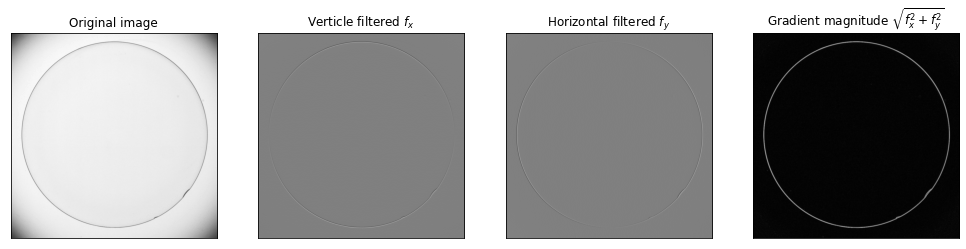

In [103]:
img_contact_lens = cv.imread("contact_lens.tif", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img_contact_lens is not None

sobel_verticle = np.array(((-1, -2, -1), (0, 0, 0), (1, 2, 1)), dtype=np.float32)
sobel_horzontal = np.array(((-1, 0, 1), (-2, 0, 2), (-1, 0, 1)), dtype=np.float32)
verticle_filtered = cv.filter2D(img_contact_lens, -1, sobel_verticle)
horizontal_filtered = cv.filter2D(img_contact_lens, -1, sobel_horzontal)
grad_mag = np.sqrt(verticle_filtered**2 + horizontal_filtered**2)

fig, ax = plt.subplots(1, 4, figsize=(17,10))

ax[0].imshow(img_contact_lens, cmap="gray", vmin=0, vmax=255)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Original image")

ax[1].imshow(verticle_filtered, cmap="gray", vmin=-1020, vmax=1020)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Verticle filtered $f_x$")

ax[2].imshow(horizontal_filtered, cmap="gray", vmin=-1020, vmax=1020)
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)
ax[2].set_title("Horizontal filtered $f_y$")

ax[3].imshow(grad_mag, cmap="gray")
ax[3].get_xaxis().set_visible(False)
ax[3].get_yaxis().set_visible(False)
ax[3].set_title("Gradient magnitude $\sqrt{f_x^2 + f_y^2}$")


plt.show()

#### Sharpening 

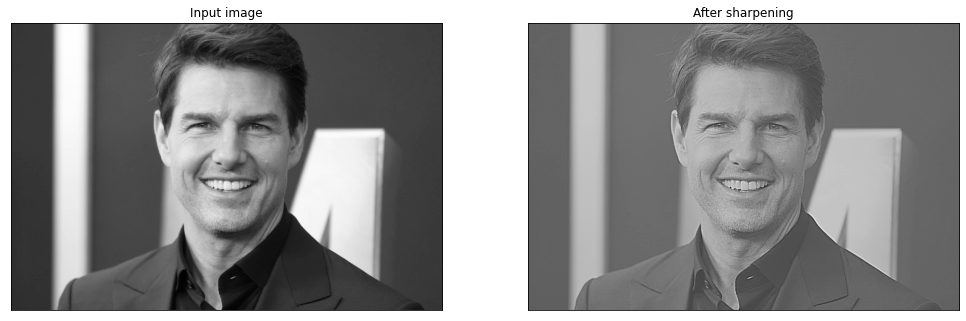

In [104]:
img_tom = cv.imread("tom.jpg", cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img_tom is not None

gaussian_1D = cv.getGaussianKernel(5, 2)
tom_lp = cv.sepFilter2D(img_tom, -1, gaussian_1D, gaussian_1D)
tom_hp = img_tom - tom_lp
tom_sharpend = cv.addWeighted(img_tom, 1.0, tom_hp, 2.0, 0)

fig, ax = plt.subplots(1, 2, figsize=(17,10))

ax[0].imshow(img_tom, cmap="gray")
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Input image")

ax[1].imshow(tom_sharpend, cmap="gray")
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("After sharpening")

plt.show()